In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [3]:
# Load the dataset
data = fetch_openml(name='adult', version=2, as_frame=True)
x = data.data
y = data.target

In [4]:
# Show dataset
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


In [5]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: class, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [6]:
# Data preprocessing: Encode the classification variables.

# Store a LabelEncoder for each categorical attribute, and this will be useful when convert the numerical values back to their original form.
label_encoders = {}
for column in x.select_dtypes(include=['category']).columns:
    label_encoders[column] = LabelEncoder()
    x[column] = label_encoders[column].fit_transform(x[column])
    
# Data preprocessing: Encode the labels
label_encoders_y = LabelEncoder()
y = label_encoders_y.fit_transform(y)

C:\Users\16477\AppData\Local\Temp\ipykernel_676\17891044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = label_encoders[column].fit_transform(x[column])
C:\Users\16477\AppData\Local\Temp\ipykernel_676\17891044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = label_encoders[column].fit_transform(x[column])
C:\Users\16477\AppData\Local\Temp\ipykernel_676\17891044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [7]:
print(y)

[0 0 1 ... 0 0 1]


In [8]:
# Split the dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Create a decision tree model.
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
# Model Training.
clf.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
# Get the prediction.
y_pred = clf.predict(x_test)

In [13]:
# Model evaluation.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


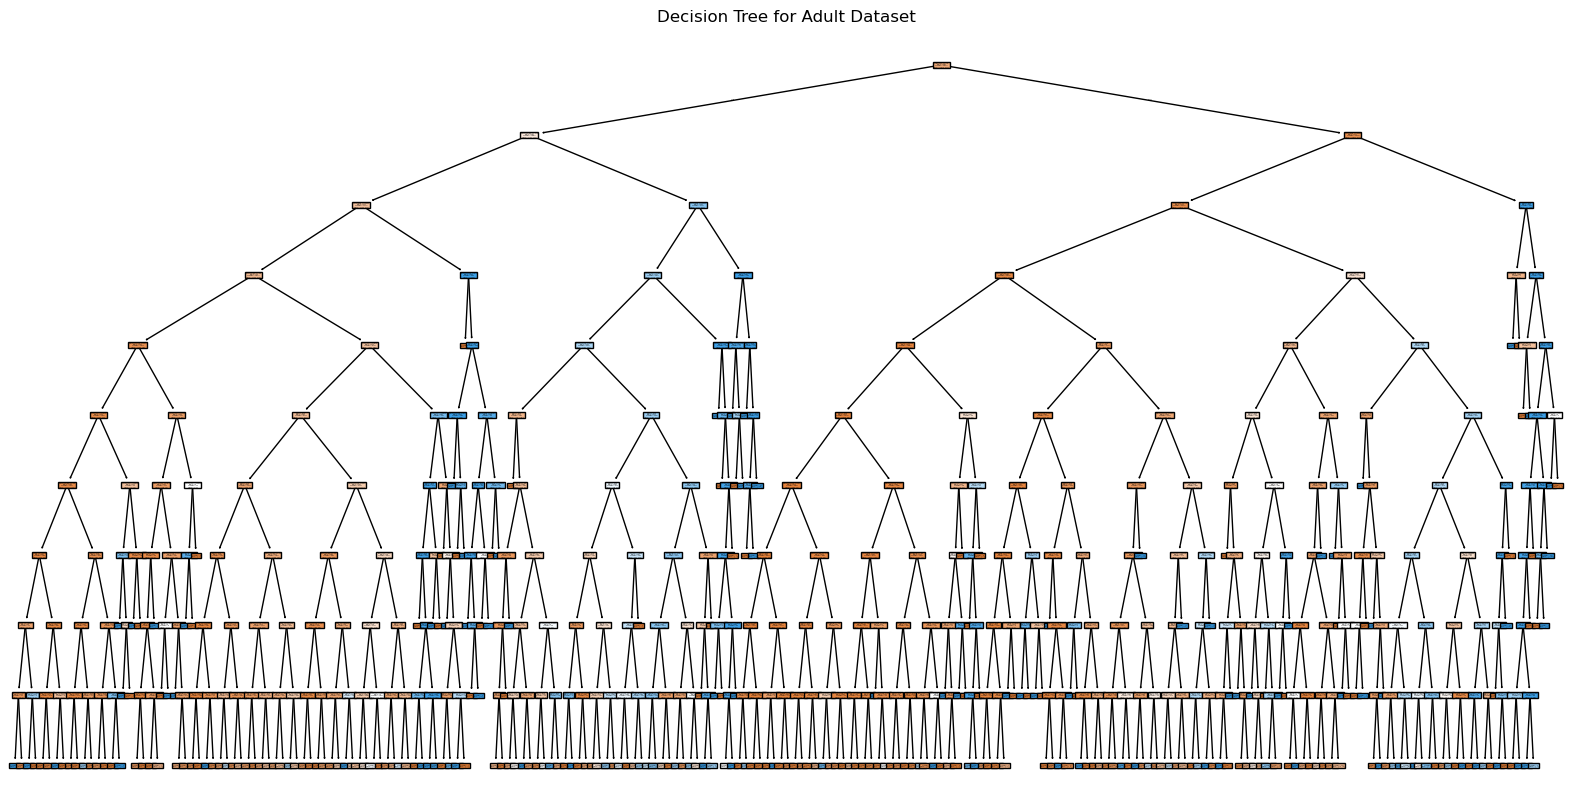

In [14]:
# Visualize the result
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=data.feature_names)
plt.title("Decision Tree for Adult Dataset")
plt.show()

In [2]:
# data loading and preprocessing
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# load the adult dataset
adult = fetch_openml(name='adult', version=2, as_frame=True)
X_raw: pd.DataFrame = adult.data
y_raw: pd.Series = adult.target

print(X_raw.shape)
print(X_raw.head())
print(y_raw.value_counts())

# normalize the data.
# "<=50K" -> 0, ">50K" -> 1
y = (y_raw == ">50K").astype(int)

# Missing value dealing
X = X_raw.replace("?", np.nan)

# 4. 简单缺失值填充：
#    - 数值特征：用中位数
#    - 分类特征：用众数
for col in X.columns:
    if is_numeric_dtype(X[col]):  # 更稳妥的判断方式
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna(X[col].mode()[0])

# 5. 类别特征 -> One-Hot（只用 pandas，不用 sklearn 的编码器也没问题）
X_encoded = pd.get_dummies(X, drop_first=True)

print("After one-hot:", X_encoded.shape)


# split the dataset into training/testing set
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded.values, y.values,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


(48842, 14)
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  
0  

In [3]:
class TreeNode:
    def __init__(self, *,
                 gini,
                 num_samples,
                 num_samples_per_class,
                 predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class

        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None


class MyDecisionTreeClassifier:
    def __init__(self,
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.n_classes_ = None
        self.n_features_ = None
        self.tree_ = None

    def fit(self, X, y):
        """训练决策树"""
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y, depth=0)
        return self

    def predict(self, X):
        """预测标签"""
        return np.array([self._predict_one(inputs) for inputs in X])

    # ----------- 内部方法 ----------- #
    def _gini(self, y):
        # Gini = 1 - sum(p_k^2)
        m = y.size
        if m == 0:
            return 0.0
        counts = np.bincount(y, minlength=self.n_classes_)
        prob = counts / m
        return 1.0 - np.sum(prob ** 2)

    def _best_split(self, X, y):
        """找到当前节点最优划分特征和阈值"""
        m, n = X.shape
        if m < self.min_samples_split:
            return None, None

        # 当前节点的 impurity
        best_gini = 1.0
        best_idx, best_thr = None, None

        for feature_idx in range(n):
            # 按该特征排序
            idx_sorted = np.argsort(X[:, feature_idx])
            X_sorted = X[idx_sorted, feature_idx]
            y_sorted = y[idx_sorted]

            # 左、右子节点的类别计数
            num_left = np.zeros(self.n_classes_, dtype=int)
            num_right = np.bincount(y_sorted, minlength=self.n_classes_)

            for i in range(1, m):  # 至少保证左右两侧都有样本
                c = y_sorted[i - 1]
                num_left[c] += 1
                num_right[c] -= 1

                if i < self.min_samples_leaf:
                    continue
                if m - i < self.min_samples_leaf:
                    break

                # 相同值不需要重复划分
                if X_sorted[i] == X_sorted[i - 1]:
                    continue

                gini_left = 1.0 - np.sum((num_left / i) ** 2)
                gini_right = 1.0 - np.sum((num_right / (m - i)) ** 2)
                gini = (i * gini_left + (m - i) * gini_right) / m

                if gini < best_gini:
                    best_gini = gini
                    best_idx = feature_idx
                    best_thr = (X_sorted[i] + X_sorted[i - 1]) / 2.0

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth):
        """递归生成决策树"""
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = int(np.argmax(num_samples_per_class))
        node = TreeNode(
            gini=self._gini(y),
            num_samples=y.size,
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class
        )

        # 是否继续划分的停止条件
        if (self.max_depth is None or depth < self.max_depth) and \
           node.gini > 0.0 and \
           y.size >= self.min_samples_split:

            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]

                if X_left.size > 0 and X_right.size > 0:
                    node.feature_index = idx
                    node.threshold = thr
                    node.left = self._grow_tree(X_left, y_left, depth + 1)
                    node.right = self._grow_tree(X_right, y_right, depth + 1)

        return node

    def _predict_one(self, inputs):
        node = self.tree_
        while node.left is not None and node.right is not None:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class


In [4]:
# 初始化自己的决策树分类器
tree = MyDecisionTreeClassifier(
    max_depth=12,         # 可以自己调
    min_samples_split=10,
    min_samples_leaf=5
)

# 训练
tree.fit(X_train, y_train)

# 在测试集上评估
y_pred = tree.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test accuracy: {accuracy:.4f}")


Test accuracy: 0.8555


In [5]:
class MyRandomForestClassifier:
    def __init__(self,
                 n_estimators=10,
                 max_features=None,      # 每棵树使用的特征数量（列数）
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state

        self.trees_ = []
        self.feature_indices_ = []
        self.n_classes_ = None
        self.n_features_ = None
        if random_state is not None:
            np.random.seed(random_state)

    def fit(self, X, y):
        """Bagging + 随机特征子集"""
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples, n_features = X.shape
        self.n_features_ = n_features
        self.n_classes_ = len(np.unique(y))

        # 处理 max_features
        if self.max_features is None:
            max_features = n_features
        else:
            max_features = min(self.max_features, n_features)

        self.trees_ = []
        self.feature_indices_ = []

        for i in range(self.n_estimators):
            # 1) 自助采样 bootstrap 样本
            bootstrap_indices = np.random.randint(0, n_samples, size=n_samples)
            X_bootstrap = X[bootstrap_indices]
            y_bootstrap = y[bootstrap_indices]

            # 2) 随机选择特征子集（列）
            feat_idx = np.random.choice(n_features,
                                        size=max_features,
                                        replace=False)
            X_bootstrap_sub = X_bootstrap[:, feat_idx]

            # 3) 训练一棵自己的决策树
            tree = MyDecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit(X_bootstrap_sub, y_bootstrap)

            self.trees_.append(tree)
            self.feature_indices_.append(feat_idx)

        return self

    def predict(self, X):
        """多数投票"""
        X = np.asarray(X)
        all_preds = []

        for tree, feat_idx in zip(self.trees_, self.feature_indices_):
            preds = tree.predict(X[:, feat_idx])
            all_preds.append(preds)

        # shape: (n_estimators, n_samples) -> (n_samples, n_estimators)
        all_preds = np.array(all_preds).T

        final_preds = []
        for row in all_preds:
            counts = np.bincount(row, minlength=self.n_classes_)
            final_preds.append(np.argmax(counts))

        return np.array(final_preds)


In [6]:
# 单棵树（你前面可能已经训练过，这里再给一版）
single_tree = MyDecisionTreeClassifier(
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5
)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)
acc_tree = np.mean(y_pred_tree == y_test)
print(f"Single decision tree accuracy: {acc_tree:.4f}")

# 自己实现的随机森林
n_features = X_train.shape[1]
# 常见设置：每棵树使用 sqrt(d) 个特征
max_features = int(np.sqrt(n_features))

rf = MyRandomForestClassifier(
    n_estimators=50,
    max_features=max_features,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = np.mean(y_pred_rf == y_test)
print(f"My Random Forest accuracy: {acc_rf:.4f}")


Single decision tree accuracy: 0.8555
My Random Forest accuracy: 0.7607


In [7]:
import matplotlib.pyplot as plt

n_features = X_train.shape[1]

n_estimators_list = [5, 10, 20, 40, 80]
feature_ratios = [0.1, 0.3, 0.5, 0.7, 1.0]
max_features_list = [max(1, int(r * n_features)) for r in feature_ratios]

results = {}  # key: max_features, value: list of accuracies for different n_estimators

for m in max_features_list:
    accs = []
    for n_est in n_estimators_list:
        rf_tmp = MyRandomForestClassifier(
            n_estimators=n_est,
            max_features=m,
            max_depth=12,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42  # 固定随机种子便于对比
        )
        rf_tmp.fit(X_train, y_train)
        y_pred_tmp = rf_tmp.predict(X_test)
        acc = np.mean(y_pred_tmp == y_test)
        accs.append(acc)
        print(f"max_features={m}, n_estimators={n_est}, acc={acc:.4f}")
    results[m] = accs

plt.figure(figsize=(8, 6))

for m, accs in results.items():
    plt.plot(n_estimators_list, accs, marker='o', label=f'max_features={m}')

plt.xlabel("Number of trees (n_estimators)")
plt.ylabel("Accuracy on test set")
plt.title("Effect of n_estimators and max_features on Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


max_features=9, n_estimators=5, acc=0.7609
max_features=9, n_estimators=10, acc=0.7608
max_features=9, n_estimators=20, acc=0.7608
max_features=9, n_estimators=40, acc=0.7607
max_features=9, n_estimators=80, acc=0.7607
max_features=29, n_estimators=5, acc=0.8378
max_features=29, n_estimators=10, acc=0.8327
max_features=29, n_estimators=20, acc=0.8293
max_features=29, n_estimators=40, acc=0.8324


KeyboardInterrupt: 